In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [13]:
loaded_model = tf.keras.models.load_model("./model/model_em3.h5")

In [77]:
datagen_test  = ImageDataGenerator(rescale = 1.0/255.0)

In [78]:
test_dataset_dir = "Data/test"

In [79]:
picture_size = 48

In [80]:
datagen_test = ImageDataGenerator(rescale = 1.0/255.0)

In [81]:
test_set = datagen_test.flow_from_directory(test_dataset_dir,
                                            target_size = (picture_size,picture_size),
                                            color_mode = "grayscale",
                                            batch_size=128,
                                            class_mode = "categorical",
                                            shuffle = False)

Found 7066 images belonging to 7 classes.


In [82]:
predictions = loaded_model.predict(test_set, verbose=1)  # Adjust verbosity as needed

56/56 [==============================] - 31s 556ms/step


In [83]:
actual_labels = test_set.classes


In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

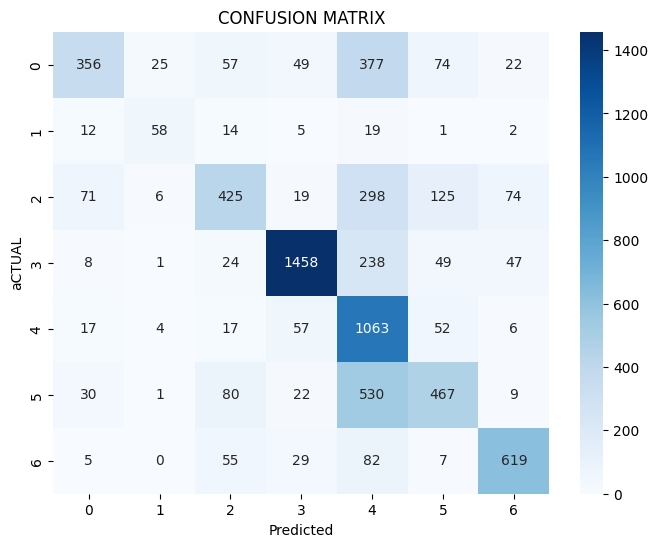

In [109]:
cm = confusion_matrix(actual_labels, predictions.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('aCTUAL')
plt.title('CONFUSION MATRIX')
plt.show()

In [86]:
labels = test_set.labels

In [87]:
predictions

array([[2.1476267e-01, 4.6225279e-03, 1.2522301e-01, ..., 4.3883723e-01,
        1.9299316e-01, 6.6865790e-03],
       [9.4399415e-02, 1.6918887e-03, 3.0595410e-01, ..., 1.6667831e-01,
        4.1689304e-01, 1.1850512e-02],
       [3.7396327e-01, 7.7712741e-03, 9.8824814e-02, ..., 3.3200720e-01,
        1.7155868e-01, 4.7544362e-03],
       ...,
       [1.5254004e-02, 3.7506167e-04, 6.9282673e-02, ..., 1.6641203e-02,
        3.2864998e-03, 8.9275861e-01],
       [1.8727351e-02, 5.3410343e-04, 2.3043109e-01, ..., 2.2042902e-02,
        1.6762907e-02, 6.4726907e-01],
       [7.3721414e-03, 8.7613662e-05, 7.5822480e-02, ..., 3.7872375e-03,
        1.7076384e-03, 8.9077109e-01]], dtype=float32)

In [103]:
pred = []
for i in predictions:
    idx = np.where(i == max(i))
    pred.append(idx[0][0])

In [104]:
pred = np.array(pred)
pred.shape

(7066,)

In [105]:
actual_labels.shape

(7066,)

In [106]:
pred.shape

(7066,)

In [3]:
import cv2